[home](/MLcloud) | [amitkaps.com](http://amitkaps.com) | [bargava.com](http://bargava.com)


# Build & Deploy ML Models in Cloud

This is a starter example to illustrate all the steps in building an ML service. 

We will predict the probability of loan default given two variables - age and income. 

## Loan Default Example

In [2]:
#Load the libraries and configuration
import numpy as np
import pandas as pd

### ** Frame -  find probability of default **

In [3]:
# Predict `default` probability

### ** Acquire - load historical data **

In [4]:
df = pd.read_csv("loan.csv") 

### **Refine - drop NAs**


In [5]:
df.dropna(axis=0, inplace=True) 

### ** Transform - log scale **

In [6]:
df['log_age'] = np.log(df.age)
df['log_income'] = np.log(df.income)

### ** Explore - age, income & default **

In [7]:
from plotnine import *
%matplotlib inline

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [70]:
plt.matshow(df.corr())

NameError: name 'plt' is not defined

In [8]:
df.head()

,default,amount,grade,years,ownership,income,age,log_age,log_income
0,0,1000,B,2.0,RENT,19200.0,24,3.178054,9.862666
1,1,6500,A,2.0,MORTGAGE,66000.0,28,3.332205,11.097410
2,0,2400,A,2.0,RENT,60000.0,36,3.583519,11.002100
3,0,10000,C,3.0,RENT,62000.0,24,3.178054,11.034890
4,1,4000,C,2.0,RENT,20000.0,28,3.332205,9.903488


In [9]:
df['default'] = df['default'].astype('category')


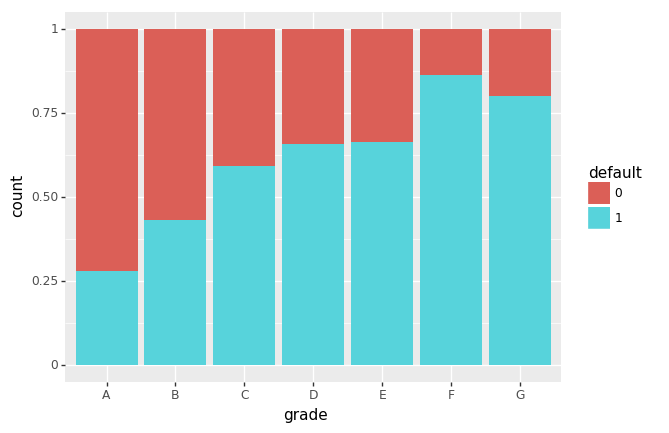

<ggplot: (292944062)>

In [24]:
ggplot(df) + aes('grade', fill ="default") + geom_bar(position = 'fill')

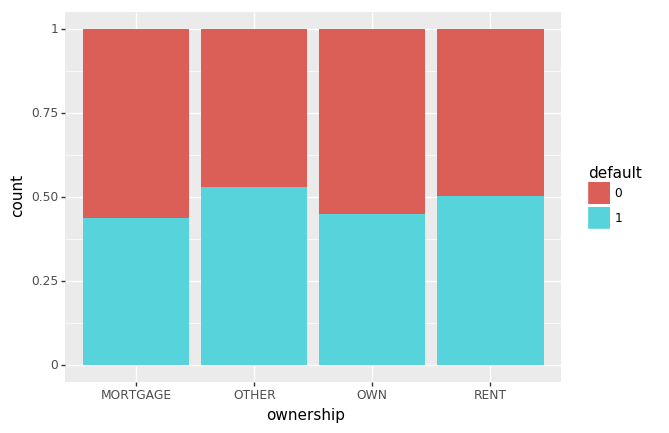

<ggplot: (-9223372036554328979)>

In [56]:
ggplot(df) + aes('ownership', fill ="default") + geom_bar(position = 'fill')

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 101'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


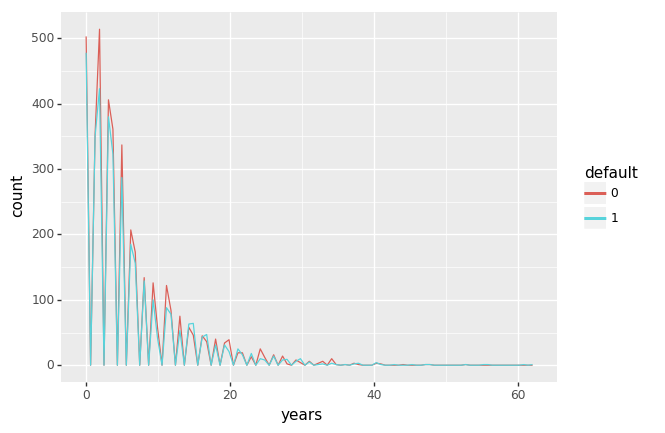

<ggplot: (293366820)>

In [55]:
(
  ggplot(df) + 
  aes('years', '..count..', color = 'default') + 
  geom_freqpoly()
)

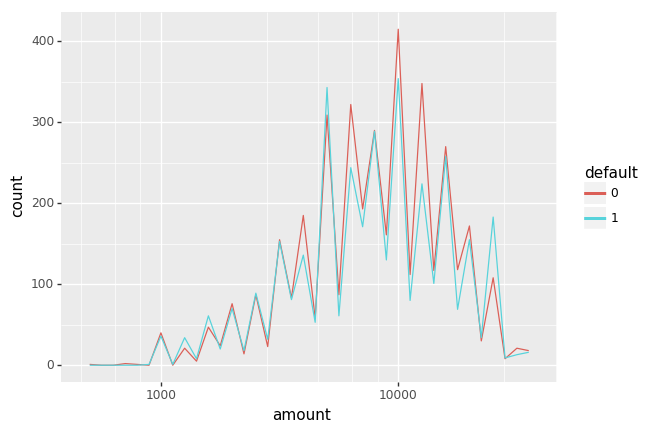

<ggplot: (299466111)>

In [53]:
(
  ggplot(df) + 
  aes('amount', '..count..', color = 'default') + 
  geom_freqpoly(binwidth = 0.05) +
  scale_x_log10()
)

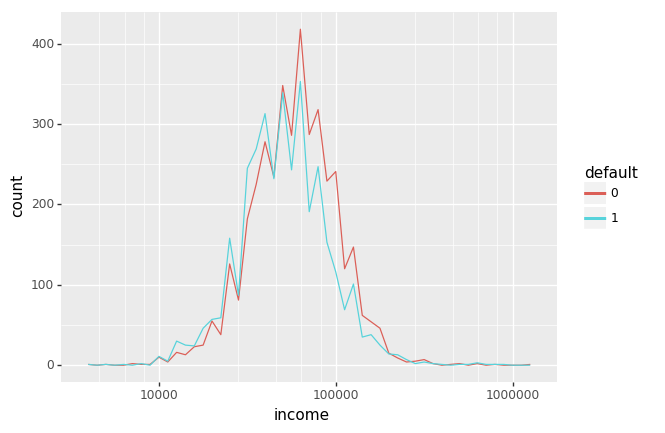

<ggplot: (301039624)>

In [52]:
(
  ggplot(df) + 
  aes('income', '..count..', color = 'default') + 
  geom_freqpoly(binwidth = 0.05) +
  scale_x_log10()
)

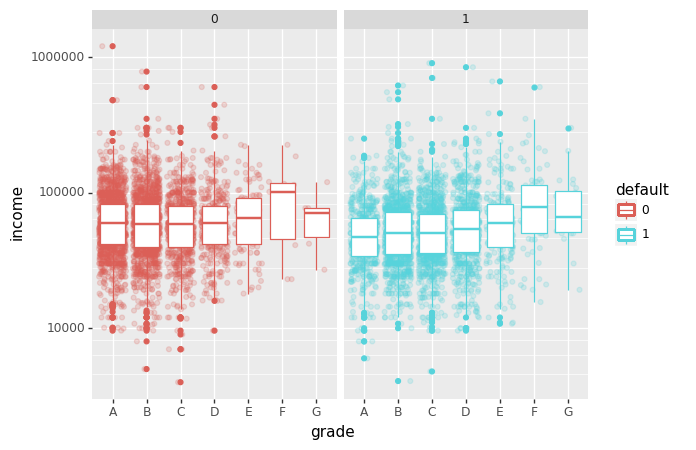

<ggplot: (-9223372036555608828)>

In [32]:
(
    ggplot(df) + 
    aes('grade', 'income', color = 'default') + 
    geom_jitter(alpha = 0.2) + geom_boxplot() +
    scale_y_log10() +
    facet_wrap('default')
)

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 30'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


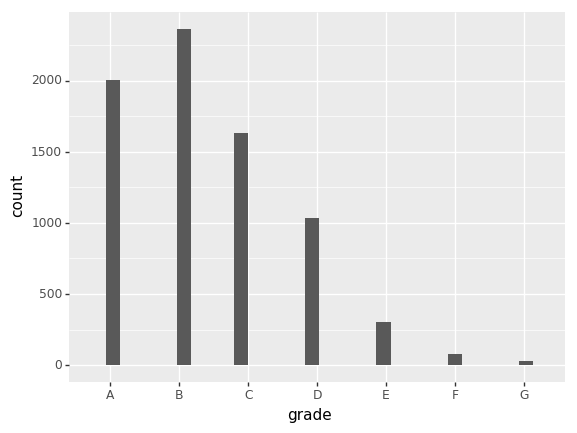

<ggplot: (303137800)>

In [36]:
ggplot(df) + aes('grade') + geom_histogram()

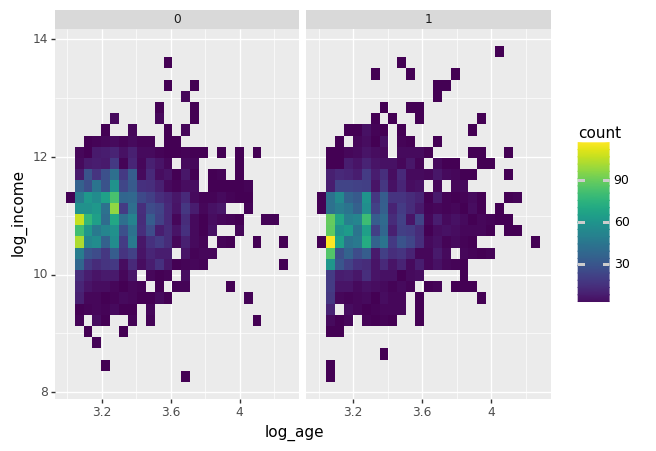

<ggplot: (299031395)>

In [68]:
ggplot(df) + aes('log_age', 'log_income') + geom_bin2d() + facet_wrap('default')

### ** Model - Build a tree classifier **

In [33]:
from sklearn import tree
from sklearn.externals import joblib
from firefly.client import Client

In [8]:
X = df.loc[:,('age', 'income')]
y = df.loc[:,'default']
clf = tree.DecisionTreeClassifier(max_depth=10).fit(X,y)
joblib.dump(clf, "clf.pkl")

['clf.pkl']

### ** Build - the ML API **

In [9]:
%%file simple.py
import numpy as np
from sklearn.externals import joblib
model = joblib.load("clf.pkl")

def predict(age, amount):
    features = [age, amount]
    prob0, prob1 = model.predict_proba([features])[0]
    return prob1

Overwriting simple.py


### ** Deploy - the ML API **

Run the following command in your terminal 

     cd credit-risk/notebooks/
     firefly simple.predict

### ** Interact - get prediction using API**

In [10]:
simple = Client("http://127.0.0.1:8000")
simple.predict(age=28, amount=10000)

0.5373423860329777

In [12]:
simple.predict(age=50, amount=240000)

1.0